## Observing Skomer Island

### Import

In [2]:
from sentinelhub import SHConfig, MimeType, SentinelHubRequest, SentinelHubDownloadClient, DataCollection, DownloadRequest, CRS, BBox, SHConfig, Geometry
from utils import plot_image

### Check credentials

In [3]:
config = SHConfig()

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret.")

### Send API request

In [4]:
evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B08", "B04", "B02"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B08, 2.5 * sample.B04, 2.5 * sample.B02];
}
"""
bbox = BBox(bbox=[-5.32013, 51.72001, -5.25804, 51.751902], crs=CRS.WGS84)

request = SentinelHubRequest(
  evalscript=evalscript,
  input_data=[
    SentinelHubRequest.input_data(
    data_collection=DataCollection.SENTINEL2_L2A,
    time_interval=('2021-07-28', '2021-07-28'),    
)
  ],
  responses=[
    SentinelHubRequest.output_response('default', MimeType.PNG),
    
  ],
  bbox=bbox,  
  size=[512, 424.507],
  config=config
)
response = request.get_data() 

### Visualise the result

The False color infrared composite maps near-infrared spectral band B8 with red and green bands, B4 and B3, to sRGB components directly. It is most commonly used to assess plant density and health, as plants reflect near infrared and green light, while absorbing red. Since they reflect more near infrared than green, plant-covered land appears deep red. Denser plant growth is darker red. Cities and exposed ground are gray or tan, and water appears blue or black.

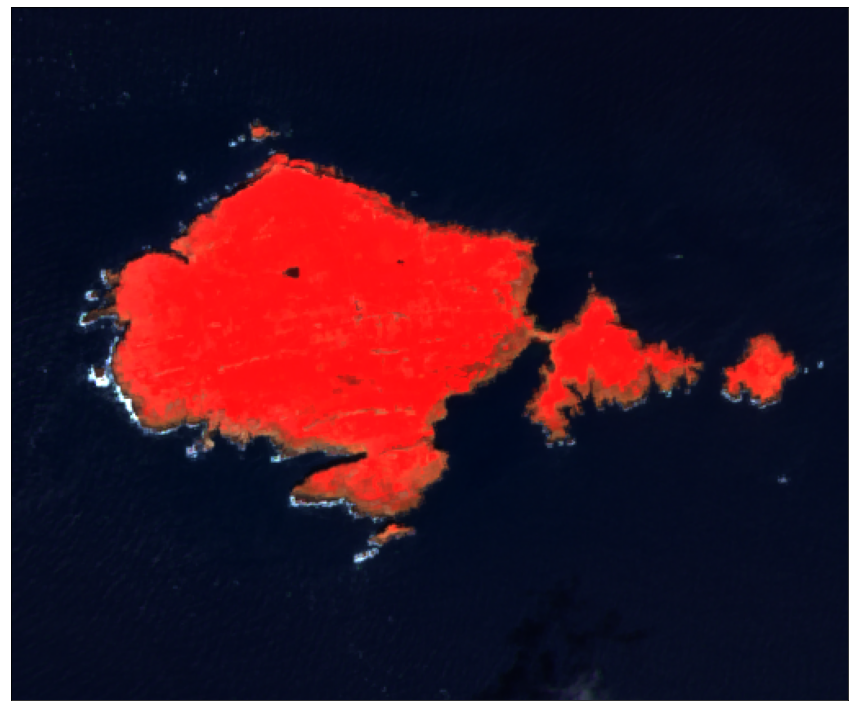

In [5]:
image = response[0]
plot_image(image, factor=1/255, clip_range=(0, 1))